In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

In [3]:
del df['CustomerID']
df.shape

(200, 4)

In [4]:
# Perform exploratory data analysis (EDA) 
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.isna().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [6]:
df.duplicated().any()

False

In [7]:
gender_count = df['Gender'].value_counts(normalize=True)
gender_count.to_frame()

,proportion
Gender,
Female,0.56
Male,0.44


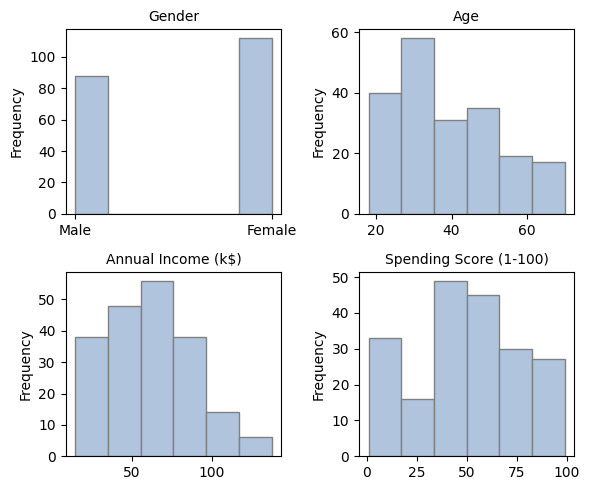

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5))
axs = axs.ravel()

for i in range(4):
    axs[i].hist(df.iloc[:,i], bins=6, color='lightsteelblue', edgecolor='grey')
    axs[i].set_title(df.columns[i], fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()

In [9]:
# Dummy Encoding 'Gender' 
data = pd.get_dummies(df, columns = ['Gender'], drop_first = True)
data['Gender_Male'] = data['Gender_Male'].astype(int)
print(data)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0     19                  15                      39            1
1     21                  15                      81            1
2     20                  16                       6            0
3     23                  16                      77            0
4     31                  17                      40            0
..   ...                 ...                     ...          ...
195   35                 120                      79            0
196   45                 126                      28            0
197   32                 126                      74            1
198   32                 137                      18            1
199   30                 137                      83            1

[200 rows x 4 columns]


In [10]:
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 
                    'Spending Score (1-100)': 'Spending_Score',
                    'Gender_Male': 'Gender'}, inplace=True)

print(data)

     Age  Annual_Income  Spending_Score  Gender
0     19             15              39       1
1     21             15              81       1
2     20             16               6       0
3     23             16              77       0
4     31             17              40       0
..   ...            ...             ...     ...
195   35            120              79       0
196   45            126              28       0
197   32            126              74       1
198   32            137              18       1
199   30            137              83       1

[200 rows x 4 columns]


,Age,Annual_Income,Spending_Score,Gender
Age,1.000000,-0.012398,-0.327227,0.060867
Annual_Income,-0.012398,1.000000,0.009903,0.056410
Spending_Score,-0.327227,0.009903,1.000000,-0.058109
Gender,0.060867,0.056410,-0.058109,1.000000


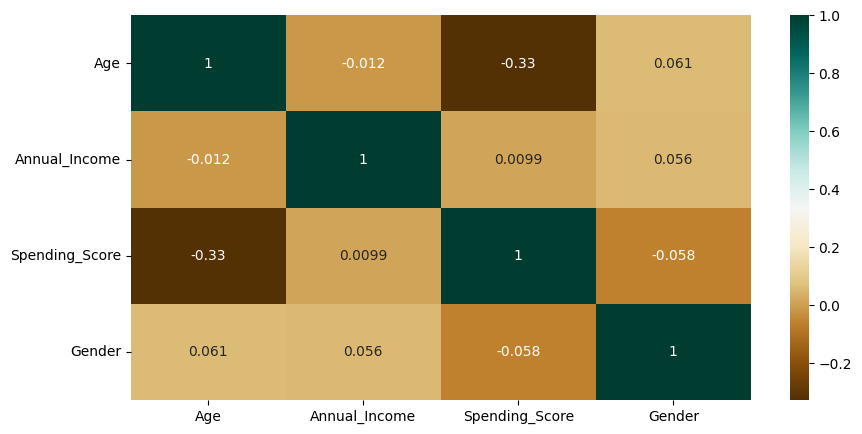

In [11]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [12]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age','Annual_Income','Spending_Score']] = scaler.fit_transform(data[['Age','Annual_Income','Spending_Score']])

print(data)

          Age  Annual_Income  Spending_Score  Gender
0   -1.424569      -1.738999       -0.434801       1
1   -1.281035      -1.738999        1.195704       1
2   -1.352802      -1.700830       -1.715913       0
3   -1.137502      -1.700830        1.040418       0
4   -0.563369      -1.662660       -0.395980       0
..        ...            ...             ...     ...
195 -0.276302       2.268791        1.118061       0
196  0.441365       2.497807       -0.861839       0
197 -0.491602       2.497807        0.923953       1
198 -0.491602       2.917671       -1.250054       1
199 -0.635135       2.917671        1.273347       1

[200 rows x 4 columns]


In [13]:
data.describe()

,Age,Annual_Income,Spending_Score,Gender
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


In [14]:
# Clustering Algorithm 1: K-means
from sklearn.cluster import KMeans

X = data.copy()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

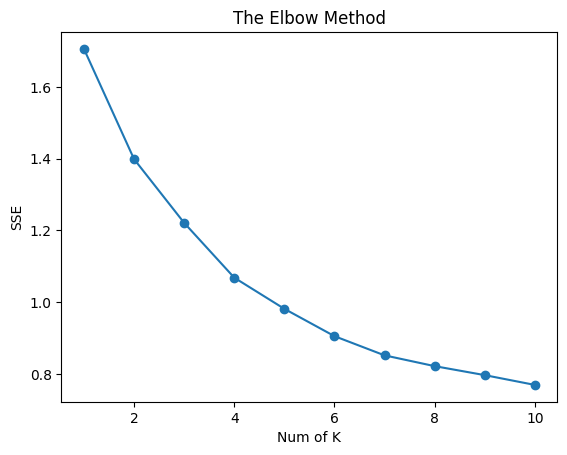

In [15]:
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap

plt.plot() 
markers = ['o','v','s']  

distortions = []
K = range(1,11)
for k in K:
    Model = KMeans(n_clusters=k).fit(X) 
    distortions.append(sum(np.min(cdist(X, Model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K,distortions,'bo-',color='tab:blue')
plt.title('The Elbow Method')
plt.xlabel('Num of K')
plt.ylabel('SSE')
plt.show()

In [16]:
model = KMeans(n_clusters=4) 
model.fit(X) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
label_pred = model.labels_ 
label_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 3, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [18]:
ctr = model.cluster_centers_  
ctr

array([[-0.96249203, -0.78476346,  0.39202966,  0.40350877],
       [ 1.08616125, -0.49056525, -0.39717443,  0.43076923],
       [ 0.03720536,  0.99011499, -1.18875705,  0.5       ],
       [-0.42880597,  0.97484722,  1.21608539,  0.45      ]])

In [19]:
# Get SSE
inertia = model.inertia_ 
print(f"The SSE is {inertia:.3f}")

The SSE is 254.283


In [20]:
from sklearn.metrics import silhouette_score
s_k = silhouette_score(data, model.labels_)
print(f"The silhouette score of K-means is {s_k:.3f}")

The silhouette score of K-means is 0.350


In [21]:
X['Cluster'] = model.labels_

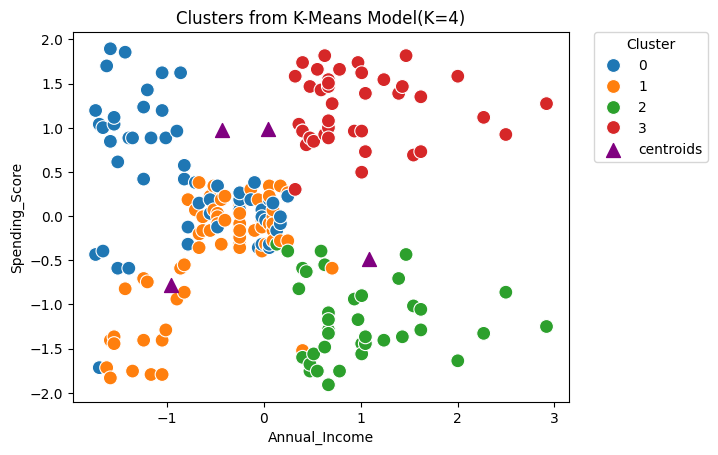

In [22]:
sns.scatterplot(data=X,x='Annual_Income', y='Spending_Score',
                hue='Cluster', palette='tab10', s=100)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            c = "purple", marker='^',label='centroids',s=100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Clusters from K-Means Model(K=4)')

plt.show()

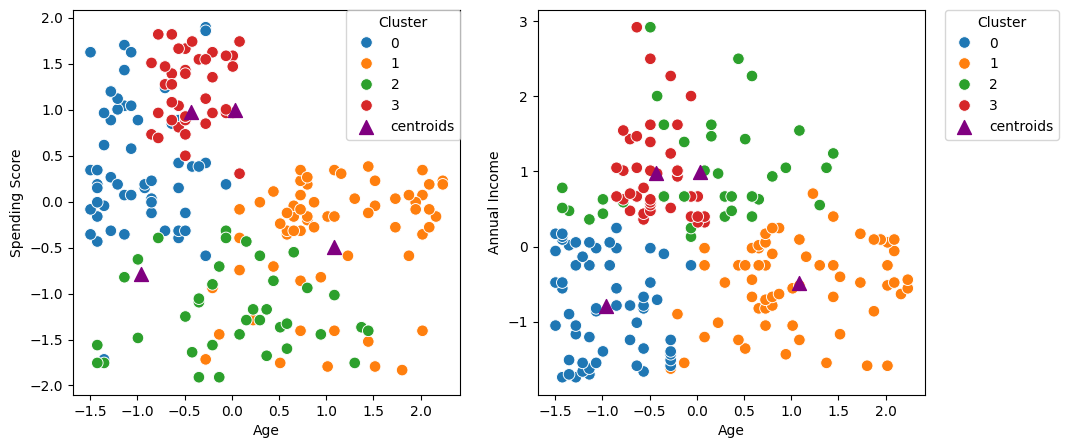

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.scatterplot(data=X, x='Age', y='Spending_Score', hue='Cluster', palette='tab10',s=70)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            c = "purple", marker='^',label='centroids',s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title='Cluster', loc='upper right', borderaxespad=0)

plt.subplot(1,2,2)
sns.scatterplot(data=X, x='Age', y='Annual_Income', hue='Cluster', palette='tab10',s=70)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            c = "purple", marker='^',label='centroids',s=100)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

In [24]:
# Analysis of each cluster
print(X)

          Age  Annual_Income  Spending_Score  Gender  Cluster
0   -1.424569      -1.738999       -0.434801       1        0
1   -1.281035      -1.738999        1.195704       1        0
2   -1.352802      -1.700830       -1.715913       0        0
3   -1.137502      -1.700830        1.040418       0        0
4   -0.563369      -1.662660       -0.395980       0        0
..        ...            ...             ...     ...      ...
195 -0.276302       2.268791        1.118061       0        3
196  0.441365       2.497807       -0.861839       0        2
197 -0.491602       2.497807        0.923953       1        3
198 -0.491602       2.917671       -1.250054       1        2
199 -0.635135       2.917671        1.273347       1        3

[200 rows x 5 columns]


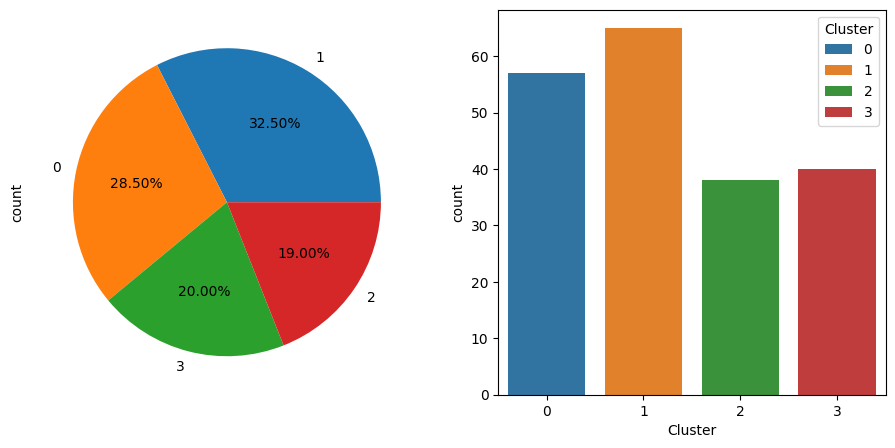

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
X['Cluster'].value_counts().plot.pie(autopct= '%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data=X, x='Cluster',hue='Cluster',palette='tab10')
plt.show()

/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/2620757614.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =X, x='Cluster',y='Spending_Score',palette='tab10')


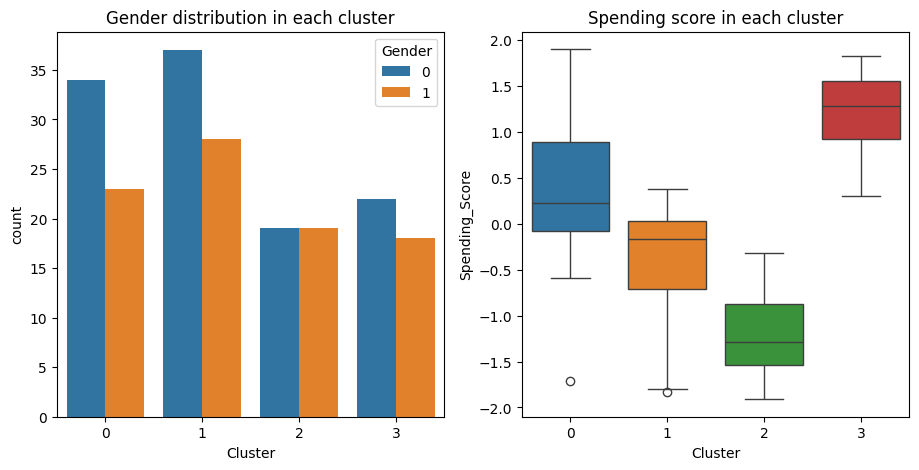

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.countplot(data=X , x='Cluster',hue='Gender',palette='tab10')
plt.title('Gender distribution in each cluster')

plt.subplot(1,2,2)
sns.boxplot(data =X, x='Cluster',y='Spending_Score',palette='tab10')
plt.title('Spending score in each cluster')

plt.show()

In [27]:
# Clustering Algorithm 2: Agglomerative Hierarchical Clustering

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_methods = ['ward', 'single', 'complete']

best_silhouette_score = -1
best_linkage = None
best_clusters = None

In [28]:
data_hc = data.copy()

for method in linkage_methods:
    linkage_matrix = linkage(data_hc, method=method)
    num_clusters = 5
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(data_hc, clusters)
    #print(silhouette_avg)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_linkage = method
        best_clusters = clusters
        
data_hc['BestCluster'] = best_clusters

print(data_hc)

          Age  Annual_Income  Spending_Score  Gender  BestCluster
0   -1.424569      -1.738999       -0.434801       1            4
1   -1.281035      -1.738999        1.195704       1            2
2   -1.352802      -1.700830       -1.715913       0            4
3   -1.137502      -1.700830        1.040418       0            2
4   -0.563369      -1.662660       -0.395980       0            4
..        ...            ...             ...     ...          ...
195 -0.276302       2.268791        1.118061       0            1
196  0.441365       2.497807       -0.861839       0            3
197 -0.491602       2.497807        0.923953       1            1
198 -0.491602       2.917671       -1.250054       1            3
199 -0.635135       2.917671        1.273347       1            1

[200 rows x 5 columns]


In [29]:
s_hc = best_silhouette_score
print(f"The silhouette score of Hierarchical Clustering is {s_hc:.3f}")

The silhouette score of Hierarchical Clustering is 0.348


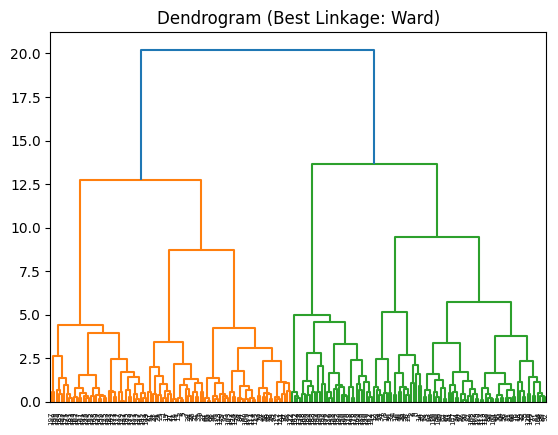

In [30]:
linkage_data = linkage(data, method=best_linkage)
dendrogram(linkage_data)

plt.title(f"Dendrogram (Best Linkage: {best_linkage.capitalize()})")
plt.show()

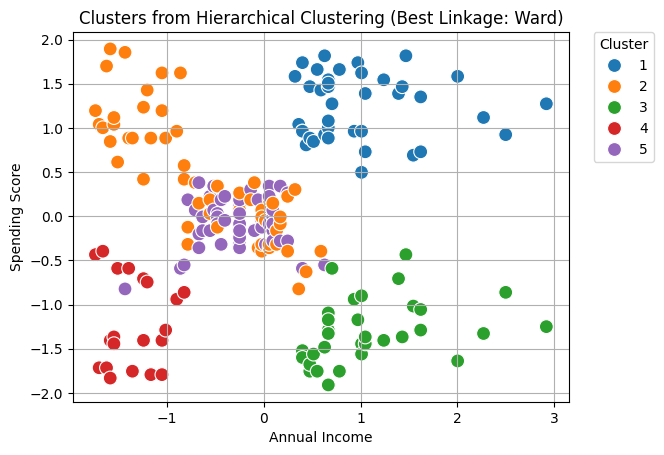

In [31]:
data_hc['BestCluster'] = best_clusters
sns.scatterplot(data=data_hc, x='Annual_Income', y='Spending_Score', hue='BestCluster', palette='tab10',s=100)
plt.title(f"Clusters from Hierarchical Clustering (Best Linkage: {best_linkage.capitalize()})")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

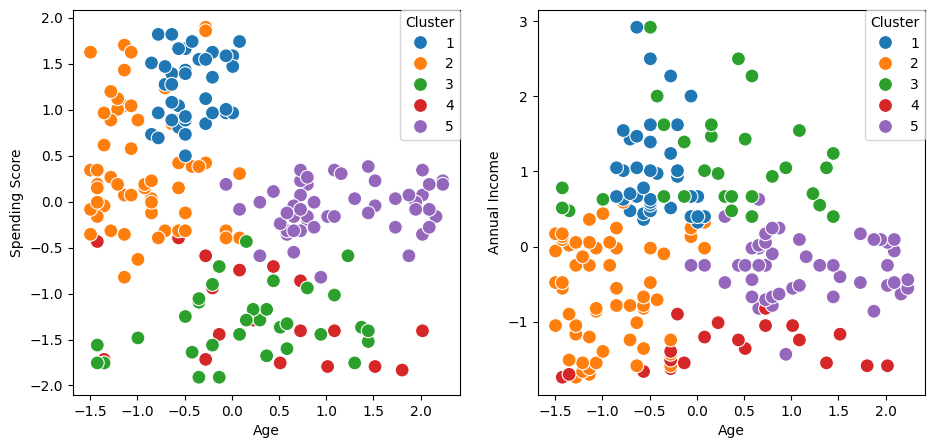

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.scatterplot(data=data_hc, x='Age', y='Spending_Score', hue='BestCluster', palette='tab10',s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title='Cluster', loc='upper right', borderaxespad=0)

plt.subplot(1,2,2)
sns.scatterplot(data=data_hc, x='Age', y='Annual_Income', hue='BestCluster', palette='tab10',s=100)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend(title='Cluster', loc='upper right', borderaxespad=0)

plt.show()

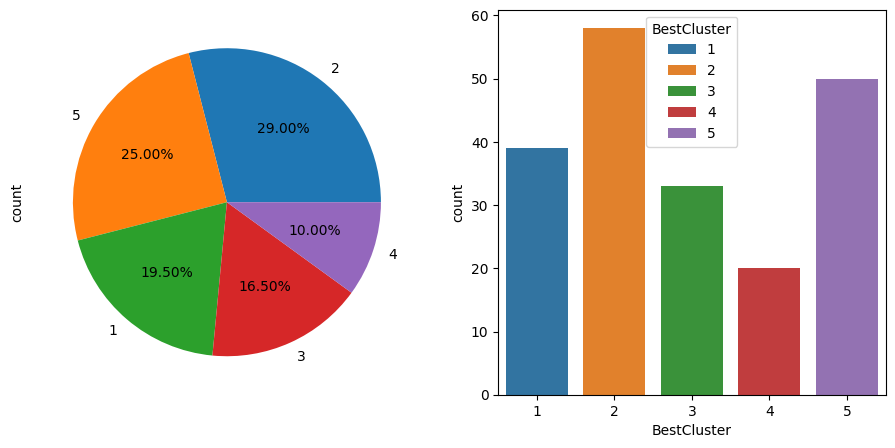

In [33]:
# Analysis of each cluster
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
data_hc['BestCluster'].value_counts().plot.pie(autopct= '%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data=data_hc, x='BestCluster',hue='BestCluster',palette='tab10')

plt.show()

/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/1710480586.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =data_hc, x='BestCluster',y='Spending_Score',palette='tab10')


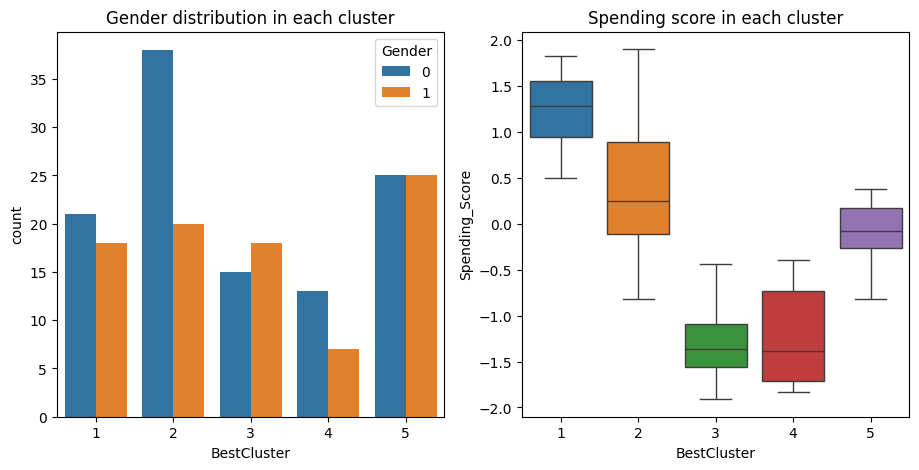

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.countplot(data=data_hc , x='BestCluster',hue='Gender',palette='tab10')
plt.title('Gender distribution in each cluster')

plt.subplot(1,2,2)
sns.boxplot(data =data_hc, x='BestCluster',y='Spending_Score',palette='tab10')
plt.title('Spending score in each cluster')

plt.show()

In [35]:
# What if we perform the Hierarchical Clustering only using 'Annual_Income' & 'Spending_Score'

best_silhouette_score = -1
best_linkage = None
best_clusters = None

data_hc_ = data.copy()
data_hc_ = data_hc_[['Annual_Income','Spending_Score']]

for method in linkage_methods:
    linkage_matrix = linkage(data_hc_, method=method)
    num_clusters = 5
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(data_hc_, clusters)
    #print(silhouette_avg)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_linkage = method
        best_clusters = clusters
        
data_hc_['BestCluster'] = best_clusters

print(data_hc_)

     Annual_Income  Spending_Score  BestCluster
0        -1.738999       -0.434801            4
1        -1.738999        1.195704            3
2        -1.700830       -1.715913            4
3        -1.700830        1.040418            3
4        -1.662660       -0.395980            4
..             ...             ...          ...
195       2.268791        1.118061            1
196       2.497807       -0.861839            2
197       2.497807        0.923953            1
198       2.917671       -1.250054            2
199       2.917671        1.273347            1

[200 rows x 3 columns]


In [36]:
s_hc_ = best_silhouette_score
print(f"The silhouette score of Hierarchical Clustering is {s_hc_:.3f}")

The silhouette score of Hierarchical Clustering is 0.554


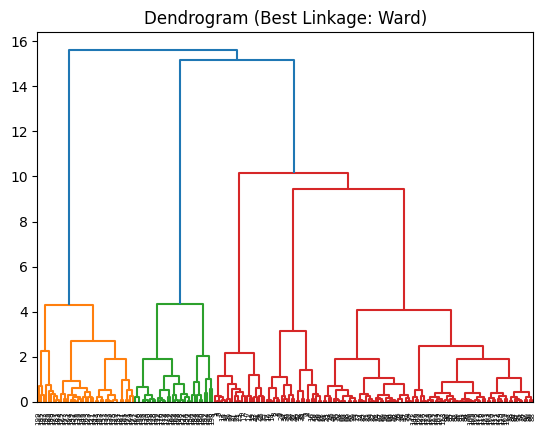

In [37]:
data_ = data.copy()
linkage_data_ = linkage(data_[['Annual_Income','Spending_Score']], method=best_linkage)
dendrogram(linkage_data_)

plt.title(f"Dendrogram (Best Linkage: {best_linkage.capitalize()})")
plt.show()

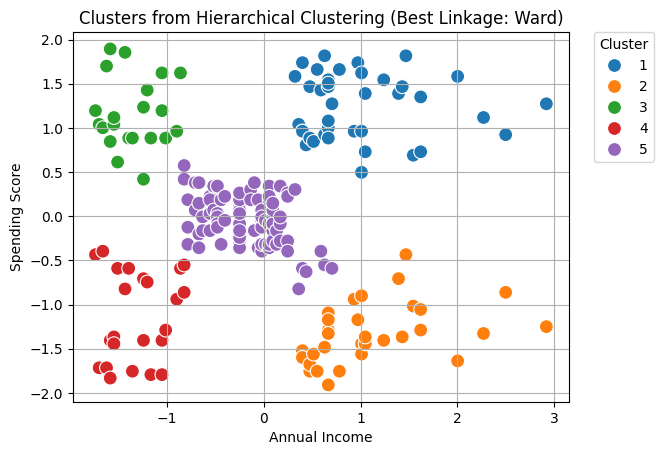

In [38]:
data_hc_['BestCluster'] = best_clusters
sns.scatterplot(data=data_hc_, x='Annual_Income', y='Spending_Score', hue='BestCluster', palette='tab10',s=100)
plt.title(f"Clusters from Hierarchical Clustering (Best Linkage: {best_linkage.capitalize()})")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

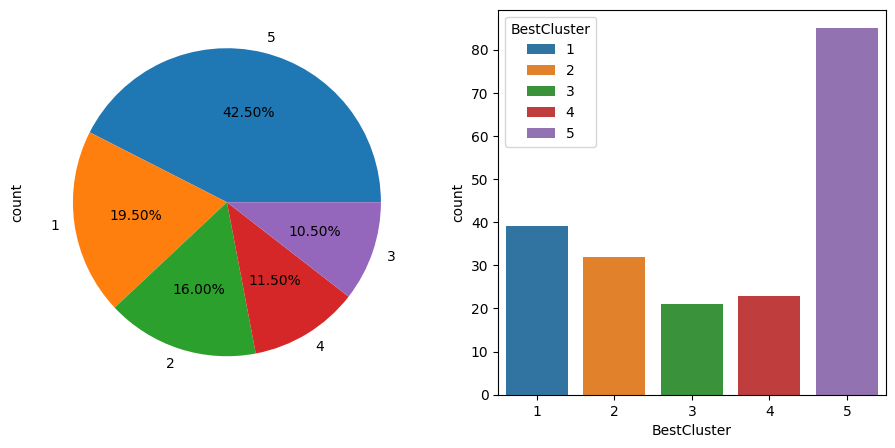

In [39]:
# Analysis of each cluster
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
data_hc_['BestCluster'].value_counts().plot.pie(autopct= '%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data=data_hc_, x='BestCluster',hue='BestCluster',palette='tab10')

plt.show()

/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/3232236460.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_hc_, x='BestCluster',y='Annual_Income',palette='tab10')
/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/3232236460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_hc_, x='BestCluster',y='Spending_Score',palette='tab10')


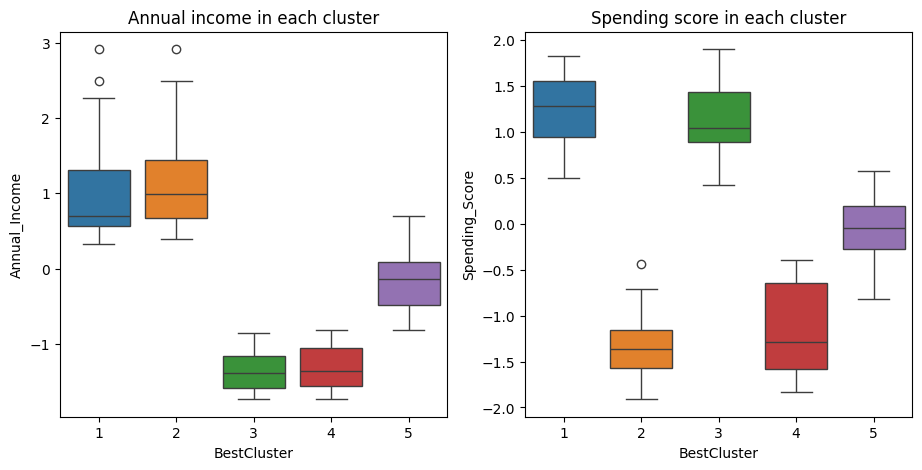

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.boxplot(data=data_hc_, x='BestCluster',y='Annual_Income',palette='tab10')
plt.title('Annual income in each cluster')

plt.subplot(1,2,2)
sns.boxplot(data=data_hc_, x='BestCluster',y='Spending_Score',palette='tab10')
plt.title('Spending score in each cluster')

plt.show()

In [41]:
# Clustering Algorithm 3: DBSCAN 
from sklearn.cluster import DBSCAN

data_db = data.copy()
data_db = data_db[['Annual_Income','Spending_Score']]

model_db = DBSCAN(eps=0.4, min_samples=5).fit(data_db)
data_db.loc[:,'Cluster'] = model_db.labels_ 
print(data_db)

     Annual_Income  Spending_Score  Cluster
0        -1.738999       -0.434801        0
1        -1.738999        1.195704        0
2        -1.700830       -1.715913        1
3        -1.700830        1.040418        0
4        -1.662660       -0.395980        0
..             ...             ...      ...
195       2.268791        1.118061       -1
196       2.497807       -0.861839       -1
197       2.497807        0.923953       -1
198       2.917671       -1.250054       -1
199       2.917671        1.273347       -1

[200 rows x 3 columns]


In [42]:
data_db.Cluster.value_counts().to_frame()

,count
Cluster,
0,115
2,32
3,27
-1,15
1,11


In [43]:
s_db = silhouette_score(data, model_db.labels_)
print(f"The silhouette score of DBSCAN is {s_db:.3f}")

The silhouette score of DBSCAN is 0.181


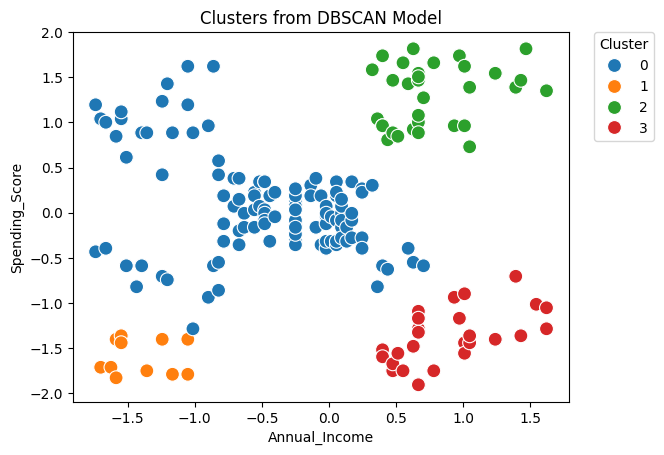

In [44]:
sns.scatterplot(data=data_db[data_db['Cluster']!=-1],
                x='Annual_Income', y='Spending_Score',
                hue='Cluster', palette='tab10', s=100)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Clusters from DBSCAN Model')
plt.show()

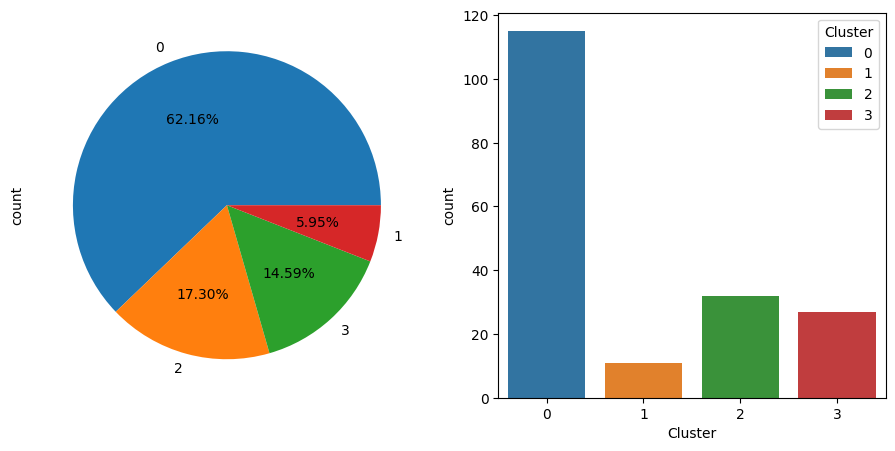

In [45]:
# Analysis of each cluster
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
data_db[data_db['Cluster']!=-1]['Cluster'].value_counts().plot.pie(autopct= '%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data=data_db[data_db['Cluster']!=-1], x='Cluster',hue='Cluster',palette='tab10')

plt.show()

/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/1623904404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =data_db[data_db['Cluster']!=-1], x='Cluster',y='Annual_Income',palette='tab10')
/var/folders/0c/yhckkwd9767bsr3v10cwg9bc0000gn/T/ipykernel_26116/1623904404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data =data_db[data_db['Cluster']!=-1], x='Cluster',y='Spending_Score',palette='tab10')


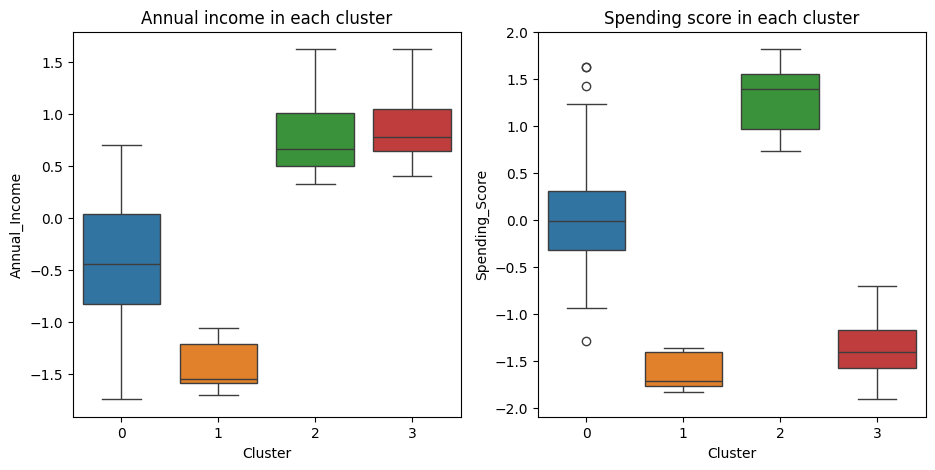

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.subplot(1,2,1)
sns.boxplot(data =data_db[data_db['Cluster']!=-1], x='Cluster',y='Annual_Income',palette='tab10')
plt.title('Annual income in each cluster')

plt.subplot(1,2,2)
sns.boxplot(data =data_db[data_db['Cluster']!=-1], x='Cluster',y='Spending_Score',palette='tab10')
plt.title('Spending score in each cluster')

plt.show()

In [47]:
# Evaluating each clustering method

ss = np.array([['K-measn', s_k],
                 ['HC_1', s_hc],
                 ['HC_2', s_hc_],
                 ['DBSCAN',s_db]])
df_ss = pd.DataFrame(ss, columns=['Model', 'Silhouette Score'])

df_ss

,Model,Silhouette Score
0,K-measn,0.3502702043465398
1,HC_1,0.3477559149875169
2,HC_2,0.5538089226688662
3,DBSCAN,0.18120685403340722
